In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload

In [2]:
import numpy as np
import astropy.units as units
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.sparse as sparse
import copy

In [3]:
%autoreload 2

In [4]:
import dualpy as dp

In [5]:
NN = 2**6
omega = np.arange(NN)
X = (np.exp(-((omega-NN/2)/(NN/4))**2) + 0j) << units.dimensionless_unscaled
X = dp.seed(X, "X", initial_type="sparse")

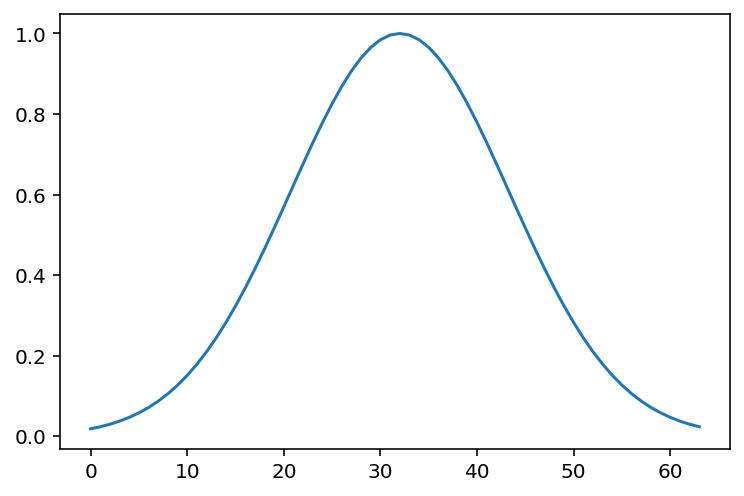

In [6]:
plt.plot(omega, X.real);

In [7]:
N = 2*(NN-1)
t = np.arange(N)
x = dp.irfft(X)

For: X, -1 has become 0, <class 'dualpy.sparse_jacobians.SparseJacobian'>
Going in, other is (126, 64), Jacobian is Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
Dependent shape is (64,) <64>
Independent shape is (64,)<64>
Combined they are (64, 64) <4096>
Dummies are (1,) and (1,)
Units are d<>/d<> = 
data2d is (64, 64) with 64 numbers stored (1.6%)
After rearrangement we have (126, 64) and (64, 64)


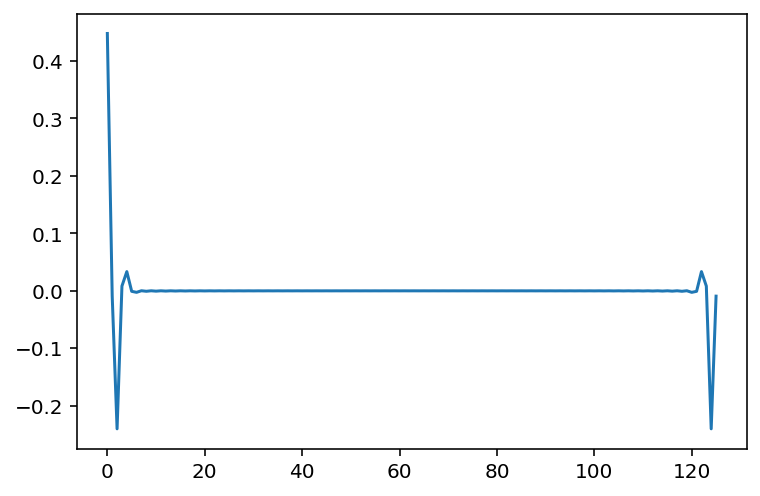

In [8]:
plt.plot(t, x);

In [9]:
j_ana, j_num = dp.compute_jacobians_numerically(dp.irfft, args=[X])

For: X, -1 has become 0, <class 'dualpy.sparse_jacobians.SparseJacobian'>
Going in, other is (126, 64), Jacobian is Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
Dependent shape is (64,) <64>
Independent shape is (64,)<64>
Combined they are (64, 64) <4096>
Dummies are (1,) and (1,)
Units are d<>/d<> = 
data2d is (64, 64) with 64 numbers stored (1.6%)
After rearrangement we have (126, 64) and (64, 64)


In [15]:
r_ana = np.real(j_ana.jacobians["X"].todensearray()).value
r_num = np.real(j_num.jacobians["X"].todensearray()).value
i_ana = np.imag(j_ana.jacobians["X"].todensearray()).value
i_num = np.imag(j_num.jacobians["X"].todensearray()).value
delta_r = r_ana - r_num
delta_i = i_ana - i_num

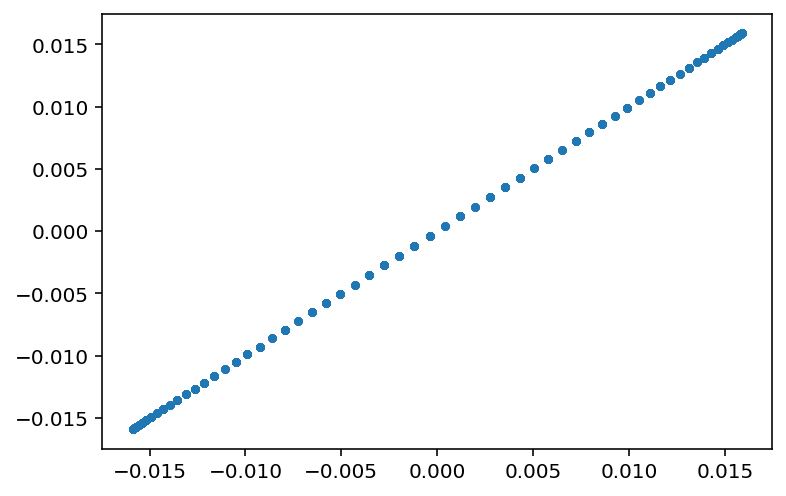

In [11]:
plt.plot(r_ana.ravel(), r_num.ravel(), '.');

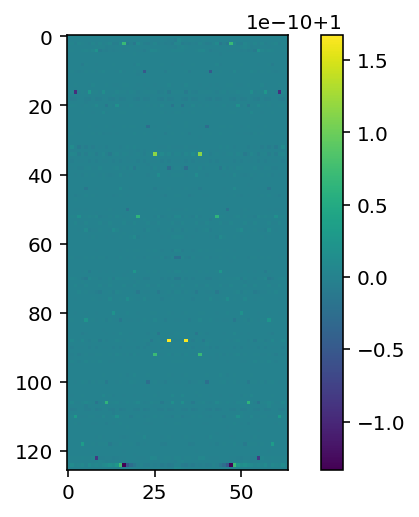

In [14]:
ratio = r_ana/r_num
plt.imshow(ratio);
plt.colorbar();

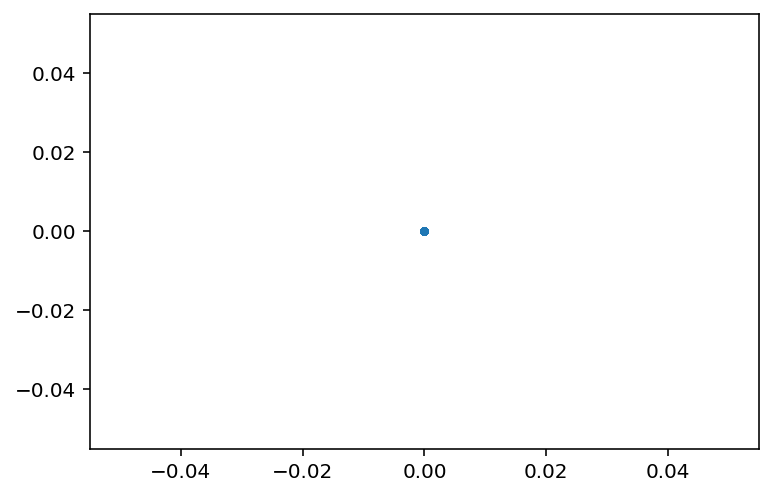

In [16]:
plt.plot(i_ana.ravel(), i_num.ravel(), '.');

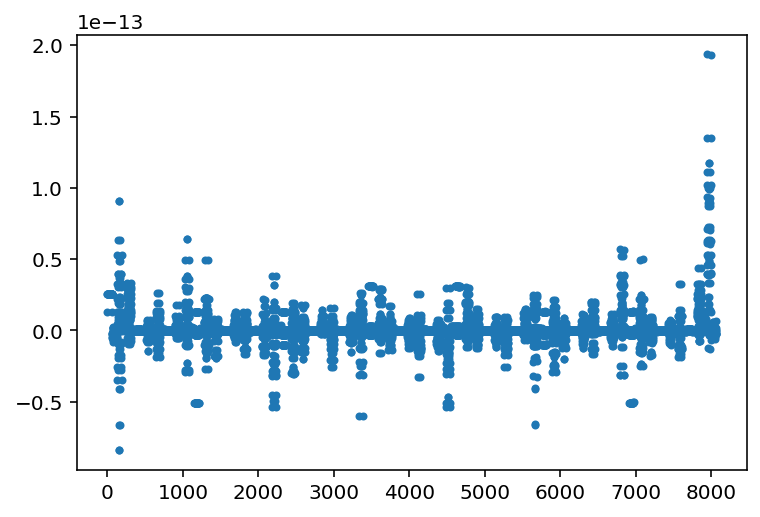

In [19]:
plt.plot(delta_r.ravel(), '.')

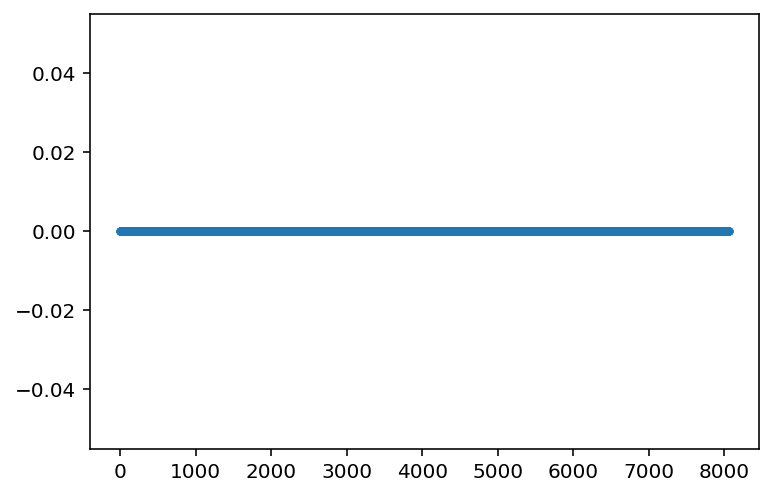

In [20]:
plt.plot(delta_i.ravel(), '.')